In [1]:
import pandas as pd
import numpy as np 

In [4]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic=df.drop(columns=['Name','Cabin','Ticket','PassengerId','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
titanic=titanic.dropna()

In [12]:
import seaborn as sns

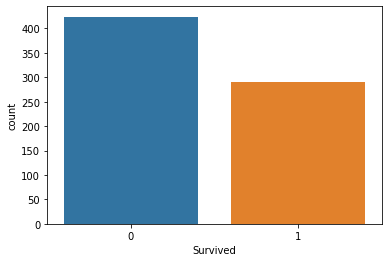

In [13]:
sns.countplot(x='Survived', data=titanic)

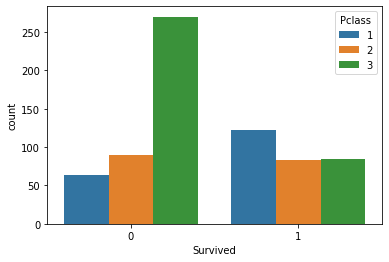

In [14]:
sns.countplot(x='Survived', hue='Pclass',data=titanic)

In [15]:
titanic=pd.get_dummies(titanic,columns=['Pclass','Sex'],drop_first=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,0,1,1


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y=titanic['Survived']
X=titanic.drop(columns=['Survived'])


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=243)

In [22]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
y_pred=lr.predict(X_test)
df_test_pred=pd.DataFrame({'Real':y_test,'Predicted':y_pred})
df_test_pred

,Real,Predicted
587,1,0
106,1,1
173,0,0
804,1,0
604,1,0
...,...,...
494,0,0
54,0,0
421,0,0
558,1,1


In [26]:
lr.score(X_test,y_test)

0.7272727272727273

In [27]:
lr.score(X_train,y_train)

0.8073555166374781

In [40]:
Juanito=np.array([[28,0,1,60,0,0,0]])

In [42]:
lr.predict(Juanito)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

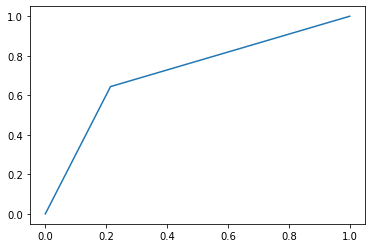

In [50]:
fpr, tpr, _ =roc_curve(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr)

In [51]:
y_test,y_pred

(587    1
 106    1
 173    0
 804    1
 604    1
       ..
 494    0
 54     0
 421    0
 558    1
 503    0
 Name: Survived, Length: 143, dtype: int64,
 array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]))

In [57]:
lr.predict_proba(X_test)[::,1][:10]

array([0.21552171, 0.66489329, 0.1381518 , 0.11774429, 0.38089259,
       0.11330032, 0.21364077, 0.75142237, 0.43930068, 0.10287118])

In [58]:
X_test[:10]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
587,60.0,1,1,79.2000,0,0,1
106,21.0,0,0,7.6500,0,1,0
173,21.0,0,0,7.9250,0,1,1
804,27.0,0,0,6.9750,0,1,1
604,35.0,0,0,26.5500,0,0,1
81,29.0,0,0,9.5000,0,1,1
122,32.5,1,0,30.0708,1,0,1
118,24.0,0,1,247.5208,0,0,1
542,11.0,4,2,31.2750,0,1,0
7,2.0,3,1,21.0750,0,1,1


In [59]:
y_test[:10]

587    1
106    1
173    0
804    1
604    1
81     1
122    0
118    0
542    0
7      0
Name: Survived, dtype: int64

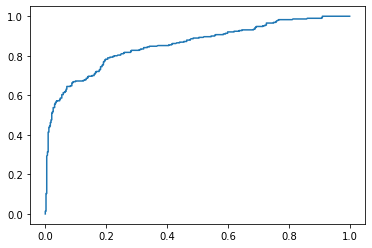

In [61]:
y_pred_prob=lr.predict_proba(X)[::,1]
fpr, tpr, _ =roc_curve(y,y_pred_prob)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr)

In [62]:
auc

0.7148910411622276

In [68]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

In [156]:
start=time.time()
tree_titanic=DecisionTreeClassifier(max_depth=6)
tree_titanic.fit(X_train,y_train)
print(time.time()-start)
y_pred=tree_titanic.predict(X_test)
y_pred

0.011056900024414062


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

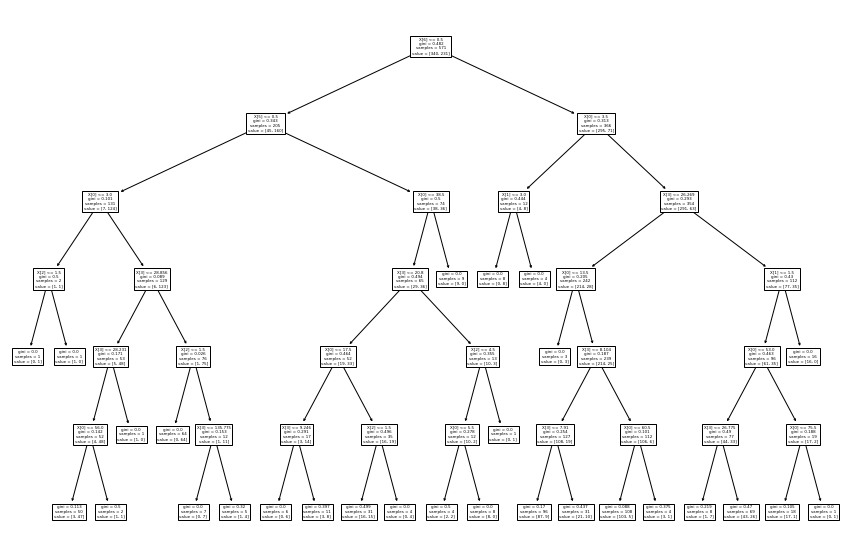

In [157]:
plt.figure(figsize=(15,10))
fig=tree.plot_tree(tree_titanic)

In [158]:
print(classification_report(y_train,tree_titanic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.89       340
           1       0.95      0.70      0.81       231

    accuracy                           0.86       571
   macro avg       0.89      0.84      0.85       571
weighted avg       0.88      0.86      0.86       571



In [159]:
print(classification_report(y_test,tree_titanic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        84
           1       0.86      0.63      0.73        59

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.80       143



In [160]:
confusion_matrix(y_test,y_pred)

array([[78,  6],
       [22, 37]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


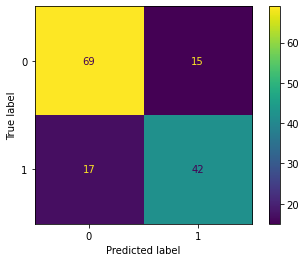

In [88]:
metrics.plot_confusion_matrix(tree_titanic, X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


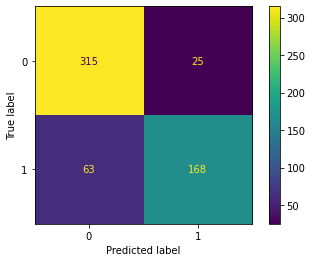

In [89]:
metrics.plot_confusion_matrix(tree_titanic, X_train,y_train)

In [90]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [154]:
import time
start=time.time()
forest=RandomForestClassifier(n_estimators=1, max_depth=10,random_state=987)
forest.fit(X_train,y_train)
print(time.time()-start)

0.01150655746459961


In [155]:
y_pred=forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        84
           1       0.72      0.66      0.69        59

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



In [150]:
extra_trees=ExtraTreesClassifier(n_estimators=1,max_depth=10, random_state=4687)

In [151]:
extra_trees.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=1, random_state=4687)

In [152]:
y_pred=extra_trees.predict(X_test)

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        84
           1       0.74      0.58      0.65        59

    accuracy                           0.74       143
   macro avg       0.74      0.72      0.72       143
weighted avg       0.74      0.74      0.73       143



In [109]:
from sklearn.svm import LinearSVC

In [110]:
clf=LinearSVC(random_state=4678)
clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=4678)

In [114]:
y_pred=clf.predict(X_test)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.86      0.73        84
           1       0.60      0.31      0.40        59

    accuracy                           0.63       143
   macro avg       0.62      0.58      0.57       143
weighted avg       0.62      0.63      0.60       143



In [116]:
from sklearn import neighbors

In [119]:
clf=neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [120]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        84
           1       0.66      0.46      0.54        59

    accuracy                           0.68       143
   macro avg       0.67      0.65      0.65       143
weighted avg       0.67      0.68      0.66       143



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


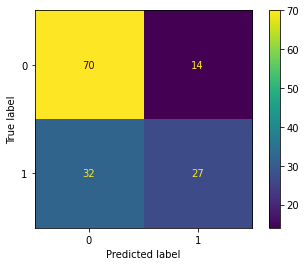

In [121]:
metrics.plot_confusion_matrix(clf,X_test,y_test)